## Gender Distributions of Collection Authors in the Rubenstein Library's Main Entry Card Catalog

These demographics were computed using the Python Gender Guesser package. As part of our exploratory data analysis, we hope to gain a better understanding of *who* is represented in the catalog. We recognize that gender is not considered as strictly binary in current times, but hope to use this analysis to evaluate the identities of the people that past librarians deemed important enough to catalog the work of in a time when gender *was* treated as more black and white than it is now. The intention of this analysis is to explore the extent of gender discrepancies in the card catalog to further study the history of the library's treatment of minority groups.

The authors of collections in the file are typically either a person or an organization. We are evaluating the gender typically associated with only the *people*. The Gender Guesser package classifies genders as one of 6 groups. Male and female result from names that are traditionally associated with one of those genders. Mostly male and mostly female result from names that are less cut and dry in regards to the gender they are associated with. "Andy," or androgynous, means that a name is not traditionally strongly associated with either gender and unknown means that the package was unable to classify a name into any of the other categories. These tended to be non-person organizations or places that would not have a gender and thus were dropped for the visualizations of the results.

In [ ]:
!pip install gender-guesser

In [1]:
import gender_guesser.detector as gender
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Collect first names from dataset
df = pd.read_csv("all_sorted_collection.csv")

first_names = []
indices = []
for index, row in df.iterrows():
    if row['Coll_head'] == 1:
        # if name contains a comma, it's likely a name and not an organization
        if ", " in str(row['Name']):
            name = str(row['Name'].split(" ")[1])
            # Find first name after Sir or Mrs.
            if ("Sir" in name or "Mrs" in name or "Dr." in name or "Capt" in name or "Miss" in name or "Lord" in name or "Doctor" in name) and len(row['Name'].split(" ")) > 2:
                name = str(row['Name'].split(" ")[2])
            # For initials, try to find whole name
            if len(name) < 2 and len(row['Name'].split(" ")) > 2 and len(str(row['Name'].split(" ")[2])) > 2:
                name = str(row['Name'].split(" ")[2])
            if not "Archive" in name and not "Army" in name and not "University" in name and not "Family" in name and not "Ministry" in name and not "CHURCH" in name.upper():
                name = name.strip(" \r\n,().")
                if not "." in name and len(name) > 3:
                    first_names.append(name)
                    indices.append(index)

In [3]:
# Detect gender for each main entry author
d = gender.Detector()

gender_counts = {
    "unknown": 0,
    "andy": 0,
    "male": 0,
    "female": 0,
    "mostly_male": 0,
    "mostly_female": 0
}

female_indices = []
male_indices = []

# Determine gender of each name
for i in range(len(first_names)):
    name = first_names[i]
    gen = d.get_gender(name)
    if gen == "unknown":
        # Common unclassified name
        if name == "Duff":
            gen = "male"
        # Check for trailing e's (common in names from OCR error) and recheck those names
        elif "e" == name[len(name)-1]:
            name = name[0:len(name)-1]
            gen = d.get_gender(name)
    if "female" in gen:
        female_indices.append(i)
    elif "male" in gen:
        male_indices.append(i)
    gender_counts[gen] += 1
    
print(gender_counts)

{'unknown': 978, 'andy': 18, 'male': 9522, 'female': 932, 'mostly_male': 67, 'mostly_female': 149}


Most of the 'unknown' gendered names are actually part of non-person organizations and will be dropped for easier visualization, for example "Britain" is part of the "Name" column, but is a title instead of a person, and thus will not be counted for the distributions.

In [24]:
# Remove unknown to create bar chart
known = gender_counts.copy()
known.pop('unknown')
known['androgynous'] = known.pop('andy')

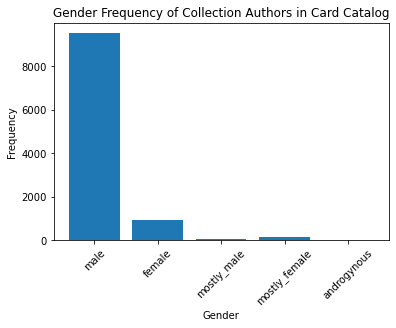

In [25]:
# Display bar chart of gender frequencies
plt.bar(*zip(*known.items()))
plt.xticks(rotation = 45)
plt.title("Gender Frequency of Collection Authors in Card Catalog")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

As shown in the above bar chart, the names of the authors present in the library's card collection are overwhelmingly male. This comes as no suprise to anyone who has looked through the cards. Something else of note is the strong presence of binarily gendered names i.e., there are very few "mostly male" or "mostly female" names (and seldom an androgynous one), most are one or the other. Perhaps this is indicative of the kinds of names that were given during the time period represented in the cards.

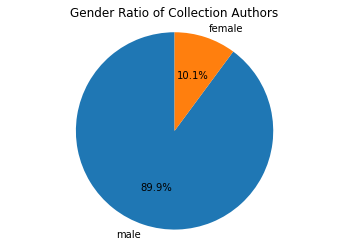

In [35]:
# Set up bar chart comparing male-leaning to female-leaning names
mf = known.copy()
mf.pop('androgynous')
mf['male'] = mf.get('male') + mf.get('mostly_male')
mf.pop('mostly_male')
mf['female'] = mf.get('female') + mf.get('mostly_female')
mf.pop('mostly_female')

plt.pie(mf.values(), labels = mf.keys(), autopct='%1.1f%%', startangle = 90)
plt.axis('equal')
plt.title("Gender Ratio of Collection Authors")
plt.show()

For the pie chart, we combined "mostly male" names with "male" names and "mostly female" names with female names to more easily visualize the gender frequencies. Androgynous names were dropped for the pie chart's sake, due to the fact they compose only about 0.02% of the names. The chart shows that about nine out of ten of the collection authors present in the main entry file were, in fact, male. This confirms our specualtions that men were more often than women represented in the catalog. In addition, this supports the theory that the "head of the household," likely the husband, would be elevated to the "author" of collections that entail multiple individuals, possibly hiding the presence of women in the collections. From this we can hypothesize other reasons for the discepency, but further research should be done into the history of archival records at Duke. Further research could also be done into the common events described in the manuscripts cataloged in the files (e.g., were there many Civil War male soldier accounts that took presidence over a wife's account of staying home and caring for her children?)

In [7]:
# Create lists of card indices by gender to create word clouds of common terms by gender
print(female_indices)

[12, 29, 41, 43, 59, 63, 64, 75, 81, 82, 84, 85, 92, 93, 125, 145, 146, 161, 186, 195, 196, 197, 198, 199, 200, 210, 216, 255, 264, 296, 302, 303, 304, 347, 348, 386, 387, 407, 422, 423, 452, 469, 470, 471, 475, 533, 535, 536, 541, 542, 543, 564, 572, 587, 588, 589, 590, 591, 593, 594, 613, 614, 642, 643, 651, 658, 666, 672, 674, 686, 698, 724, 736, 738, 739, 771, 772, 782, 783, 797, 817, 822, 827, 828, 855, 860, 865, 868, 874, 875, 911, 916, 933, 946, 950, 955, 960, 979, 993, 994, 1013, 1058, 1071, 1104, 1105, 1106, 1108, 1115, 1121, 1126, 1127, 1145, 1146, 1149, 1184, 1212, 1232, 1258, 1268, 1270, 1306, 1309, 1319, 1339, 1384, 1389, 1390, 1393, 1409, 1411, 1413, 1421, 1422, 1430, 1431, 1432, 1444, 1445, 1446, 1447, 1449, 1465, 1466, 1467, 1480, 1488, 1519, 1527, 1528, 1530, 1537, 1538, 1550, 1555, 1592, 1603, 1608, 1618, 1619, 1622, 1659, 1660, 1669, 1676, 1682, 1688, 1712, 1713, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1746, 1750, 1753, 1775, 1799, 1800, 1815, 1818, 1850, 186

In [8]:
print(male_indices)

[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 60, 61, 62, 65, 66, 68, 69, 70, 71, 72, 73, 74, 77, 78, 80, 83, 86, 87, 89, 90, 91, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 143, 144, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 193, 194, 201, 202, 203, 204, 205, 206, 207, 211, 212, 213, 215, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 256, 257, 258, 259, 260, 261, 262, 263, 265, 266, 267, 268, 269, 2